In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
cifar10_train=datasets.CIFAR10(root="data/cifar10_data",
                               train=True,
                               download=True,
                               transform=transforms.Compose([transforms.ToTensor()]))
cifar10_test=datasets.CIFAR10(root="data/cifar10_data",
                               train=False,
                               download=True,
                               transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 170M/170M [00:14<00:00, 11.9MB/s] 


In [3]:
print(cifar10_train)
print(cifar10_test)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data/cifar10_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data/cifar10_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [4]:
print(cifar10_train.data.shape)
#print(cifar10_train.data[0])
print(cifar10_train.targets[:10])

(50000, 32, 32, 3)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [5]:
def plot(x, y):
  plt.figure(figsize=(8,6))
  for i in range(len(x)):
    plt.subplot(5,5, i+1)
    plt.title(y[i])
    img=np.array(x[i].reshape(32,32,3))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
  plt.show()

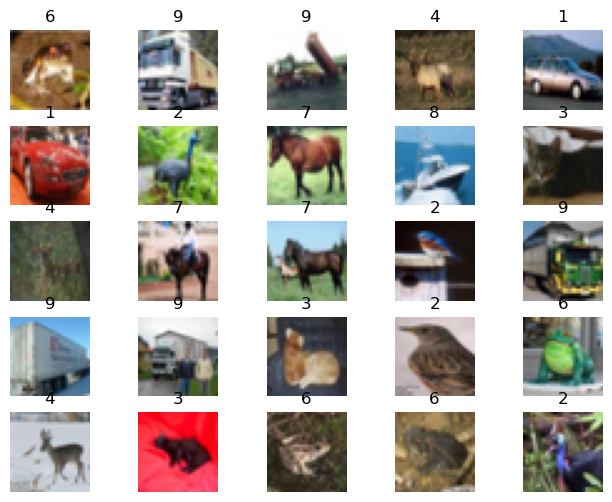

In [6]:
plot(cifar10_train.data[:25], cifar10_train.targets[:25])

In [7]:
print(type(cifar10_train.data))
print(cifar10_train.targets)

<class 'numpy.ndarray'>
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 

In [8]:
# train_data:(row, col, chanel)-> (chanel, row, col)
cifar10_train.data1=torch.FloatTensor(cifar10_train.data).permute(0,3,1,2)
cifar10_train.targets1=torch.LongTensor(cifar10_train.targets)
print(cifar10_train.data1.size())
print(cifar10_train.targets1.size())
print(type(cifar10_train.data1))
print(type(cifar10_train.targets1))

torch.Size([50000, 3, 32, 32])
torch.Size([50000])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [9]:
x1=cifar10_train.data1.float()/255
y=cifar10_train.targets1
x1[0]

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [10]:
x=x1.view(x1.size(0),-1)
print(x.size())
input_size=x.size(-1) #3072 =3*32*32
output_size=int(max(y))+1 #10

torch.Size([50000, 3072])


In [11]:
#test data (row, col, chanel) => (chanel, row, col)
cifar10_test.data1=torch.FloatTensor(cifar10_test.data).permute(0,3,1,2)
cifar10_test.targets1=torch.LongTensor(cifar10_test.targets)

In [12]:
cifar10_test.data1.size()

torch.Size([10000, 3, 32, 32])

In [13]:
ratio=[0.8,0.2]
train_cnt=int(x.size(0)*ratio[0]) #50000*0.8
valid_cnt=int(x.size(0)*ratio[1]) #50000*0.2
test_cnt=len(cifar10_test.data)
print(train_cnt, valid_cnt, test_cnt)
cnts=[train_cnt, valid_cnt]

40000 10000 10000


In [14]:
indices=torch.randperm(x.size(0)) # 0~49999 숫자를 랜덤하게 섞어줌
#print(indices)
x1=torch.index_select(x, dim=0, index=indices) #x데이터의 순서를 indices순서로 선택
y1=torch.index_select(y, dim=0, index=indices)

In [15]:
# train data, valid data 분리
x2=list(x.split(cnts, dim=0))
y2=list(y.split(cnts, dim=0))
x2+=[(cifar10_test.data1.float()/255).view(test_cnt,-1)]
y2+=[cifar10_test.targets1]

In [16]:
for x_i, y_i in zip(x2, y2):
    print(x_i.size(), y_i.size())

torch.Size([40000, 3072]) torch.Size([40000])
torch.Size([10000, 3072]) torch.Size([10000])
torch.Size([10000, 3072]) torch.Size([10000])


Batch Normalization : 
신경망의 출력값을 평균 0, 분산 1가깝게 정규화하여 
학습 안정성 높임
수렴속도 높임
큰 학습률 사용 가능
초기 값에 덜 민감하게 함.
- 모델 학습의 성능을 높임

In [17]:
model=nn.Sequential(
    nn.Linear(input_size, 500),
    nn.LeakyReLU(),
    nn.BatchNorm1d(500),
    nn.Linear(500, 400),
    nn.LeakyReLU(),
    nn.BatchNorm1d(400),
    nn.Linear(400, 300),
    nn.LeakyReLU(),
    nn.BatchNorm1d(300),
    nn.Linear(300, 200),
    nn.LeakyReLU(),
    nn.BatchNorm1d(200),
    nn.Linear(200, 100),
    nn.LeakyReLU(),
    nn.BatchNorm1d(100),
    nn.Linear(100, output_size)
)
model

Sequential(
  (0): Linear(in_features=3072, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=500, out_features=400, bias=True)
  (4): LeakyReLU(negative_slope=0.01)
  (5): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=400, out_features=300, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Linear(in_features=300, out_features=200, bias=True)
  (10): LeakyReLU(negative_slope=0.01)
  (11): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Linear(in_features=200, out_features=100, bias=True)
  (13): LeakyReLU(negative_slope=0.01)
  (14): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): Linear(in_features=100, out_features=10, bia

In [18]:
crit=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())

In [19]:
epochs=1001
batch_size=256
from copy import deepcopy
lowest_loss=np.inf # 최소 비용함수 값
lowest_epoch=np.inf # 최소 비용함수 일때 epoch
best_model=None
early_stop=50

In [20]:
train_history, valid_history=[],[]

for epoch in range(epochs):
  x_=x2[0].split(batch_size, dim=0)
  y_=y2[0].split(batch_size, dim=0)

  train_loss=0
  y_hat=[]
  for x_i, y_i in zip(x_, y_):
      #print(x_i.size(), y_i.size())
      y_hat_i=model(x_i)
      loss=crit(y_hat_i, y_i.squeeze())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      train_loss+=float(loss)

  train_loss=train_loss/len(x_) # train_loss/(40000/256)

  with torch.no_grad():
      x_=x2[1].split(batch_size, dim=0)
      y_=y2[1].split(batch_size, dim=0)
      valid_loss=0

      for x_i, y_i in zip(x_, y_):
          y_hat_i=model(x_i)
          loss=crit(y_hat_i, y_i.squeeze())
          valid_loss+=float(loss)

          y_hat+=[y_hat_i]
      valid_loss=valid_loss/len(x_) #10000/255
  
  train_history+=[train_loss]
  valid_history+=[valid_loss]

  if epoch%10==0:
    print(f'epoch:{epoch},train_loss:{train_loss},valid_loss:{valid_loss},lowest_loss:{lowest_loss}')
  
  if valid_loss <= lowest_loss:
    lowest_loss=valid_loss
    lowest_epoch=epoch
    best_model=deepcopy(model)
  else:
    if early_stop > 0 and lowest_epoch+early_stop < epoch:
        print(f'{lowest_epoch}이후 {early_stop}증가하는 동안 손실함수 감소 없음')
        break
    
print(f'epoch {lowest_epoch}일 때 손실함수 {lowest_loss}가 검증데이터로 가장 낮은 손실함수 값을 가짐')

C:\Users\it\AppData\Local\Temp\ipykernel_9732\785680563.py:16: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  train_loss+=float(loss)


epoch:0,train_loss:1.7302710334206843,valid_loss:1.651491892337799,lowest_loss:inf
epoch:10,train_loss:0.9903269742324854,valid_loss:1.5224174410104752,lowest_loss:1.4305900424718856
epoch:20,train_loss:0.5586447012936993,valid_loss:2.0118278563022614,lowest_loss:1.4305900424718856
epoch:30,train_loss:0.28423733572671367,valid_loss:2.7177970945835113,lowest_loss:1.4305900424718856
epoch:40,train_loss:0.1685323723040189,valid_loss:3.217887210845947,lowest_loss:1.4305900424718856
epoch:50,train_loss:0.14344106912375634,valid_loss:3.608165365457535,lowest_loss:1.4305900424718856
6이후 50증가하는 동안 손실함수 감소 없음
epoch 6일 때 손실함수 1.4305900424718856가 검증데이터로 가장 낮은 손실함수 값을 가짐


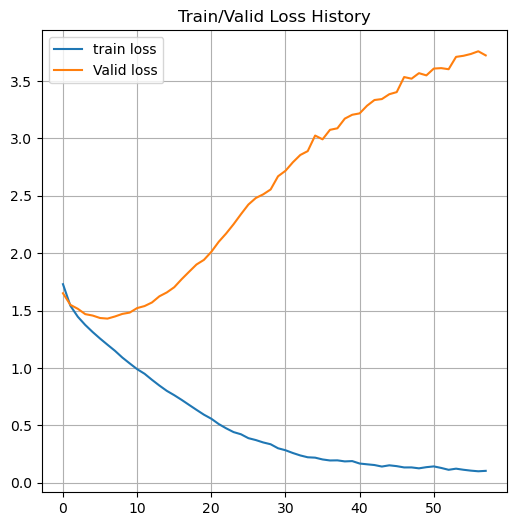

In [21]:
plot_from=0
plt.figure(figsize=(6,6))
plt.grid(True)
plt.title("Train/Valid Loss History")
plt.plot(range(plot_from, len(train_history)), train_history[plot_from:],label="train loss")       
plt.plot(range(plot_from, len(valid_history)), valid_history[plot_from:],label='Valid loss')
plt.legend()
plt.show()

In [22]:
best_model.eval()
test_loss=0
y_hat=[]
with torch.no_grad():
    x_=x2[-1].split(batch_size, dim=0) #10000/256
    y_=y2[-1].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i=best_model(x_i)
        loss=crit(y_hat_i, y_i.squeeze())
        test_loss+=loss
        y_hat+=[y_hat_i]

test_loss=test_loss/len(x_)
y_hat=torch.cat(y_hat, dim=0)
print('test loss:',test_loss)

test loss: tensor(1.4129)


In [23]:
correct_cnt=(y2[-1].squeeze()==torch.argmax(y_hat, dim=-1)).sum()
print(correct_cnt/10000)

tensor(0.5014)


In [24]:
import pandas as pd
from sklearn.metrics import confusion_matrix
df=pd.DataFrame(confusion_matrix(y2[-1], torch.argmax(y_hat, dim=-1)))
df

,0,1,2,3,4,5,6,7,8,9
0,569,30,53,21,27,28,36,57,133,46
1,59,558,23,22,12,22,22,27,80,175
2,91,16,355,66,126,86,152,78,12,18
3,34,17,92,311,61,209,167,45,25,39
4,42,16,136,62,404,41,173,89,24,13
5,22,8,99,190,52,410,113,64,18,24
6,8,23,49,64,88,44,678,21,8,17
7,33,18,49,61,75,76,51,570,17,50
8,106,46,26,25,23,42,17,18,636,61
9,48,160,26,40,12,32,25,50,84,523
